# Exportação de Vinhos do Brasil

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from unidecode import unidecode

# Configurações: não mostrar barra lateral, não mostrar barra do topo, background transparente
custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False, 'axes.labelpad': 20, 'axes.titlepad': 20}
sns.set_theme(style="white", palette=sns.color_palette("pastel"), rc=custom_params)


In [2]:
# mpl.rcParams


In [3]:
df_inflacao = pd.read_csv('dados/inflacao.csv')
df_inflacao.columns = ['ano', 'Brasil', 'Estados Unidos', 'Russia', 'Paraguai']
df_inflacao = df_inflacao.melt(
    id_vars=['ano'], var_name='pais_destino', value_name='inflacao_destino')
df_inflacao


,ano,pais_destino,inflacao_destino
0,2006,Brasil,4.18
1,2007,Brasil,3.64
2,2008,Brasil,5.68
3,2009,Brasil,4.89
4,2010,Brasil,5.04
...,...,...,...
59,2017,Paraguai,3.60
60,2018,Paraguai,3.98
61,2019,Paraguai,2.76
62,2020,Paraguai,1.77


In [4]:
df_cambio = pd.read_csv('dados/cambio.csv')
df_cambio


,ano,taxa_cambio
0,2006,2.1761
1,2007,1.9479
2,2008,1.8346
3,2009,1.9976
4,2010,1.7603
5,2011,1.6750
6,2012,1.9546
7,2013,2.1576
8,2014,2.3534
9,2015,3.3315


In [5]:
# selecionar somente o produto do tipo "Vinho de Mesa" exportados nos últimos 15 anos
df_exportacao = pd.read_csv(
    'dados/formatted/df_exportacao_2.csv', encoding='utf-8', sep='|')
df_vinhos = df_exportacao.query(
    "tipo in ('Vinho de mesa', 'Espumante') and ano>= 2006")

df_vinhos = df_vinhos.drop(df_vinhos[df_vinhos['pais_destino'] == 'Brasil'].index)
df_vinhos['pais_destino'] = df_vinhos['pais_destino'].apply(unidecode)
df_vinhos = df_vinhos.groupby(['ano', 'pais_destino', 'tipo']).agg({'quantidade': 'sum', 'valor': 'sum'}).reset_index()

total_quantidade = df_vinhos['quantidade'].sum()
total_valor = df_vinhos['valor'].sum()

df_vinhos['proporcao_quantidade'] = df_vinhos['quantidade'] / total_quantidade
df_vinhos['proporcao_valor'] = df_vinhos['valor'] / total_valor
df_vinhos['valor_medio'] = df_vinhos['valor'] / df_vinhos['quantidade']

total_por_ano = df_vinhos.groupby('ano')['quantidade'].sum()
df_vinhos['market_share'] = df_vinhos.apply(lambda row: row['quantidade'] / total_por_ano[row['ano']], axis=1)

df_vinhos = df_vinhos.merge(df_inflacao, left_on=['ano', 'pais_destino'], right_on=[
                            'ano', 'pais_destino'], how='left')
df_vinhos = df_vinhos.merge(
    df_cambio, left_on=['ano'], right_on=['ano'], how='left')

display(df_vinhos)


,ano,pais_destino,tipo,quantidade,valor,proporcao_quantidade,proporcao_valor,valor_medio,market_share,inflacao_destino,taxa_cambio
0,2006,Afeganistao,Vinho de mesa,0,0,0.000000,0.000000,NaN,0.000000,NaN,2.1761
1,2006,Africa do Sul,Vinho de mesa,0,0,0.000000,0.000000,NaN,0.000000,NaN,2.1761
2,2006,Alemanha,Espumante,153,928,0.000002,0.000007,6.065359,0.000043,NaN,2.1761
3,2006,"Alemanha, Republica Democratica",Vinho de mesa,38302,89231,0.000412,0.000712,2.329669,0.010711,NaN,2.1761
4,2006,Angola,Espumante,3314,6657,0.000036,0.000053,2.008751,0.000927,NaN,2.1761
...,...,...,...,...,...,...,...,...,...,...,...
3515,2021,Vanuatu,Vinho de mesa,0,0,0.000000,0.000000,NaN,0.000000,NaN,5.3950
3516,2021,Venezuela,Espumante,0,0,0.000000,0.000000,NaN,0.000000,NaN,5.3950
3517,2021,Venezuela,Vinho de mesa,26415,35944,0.000284,0.000287,1.360742,0.002937,NaN,5.3950
3518,2021,Vietna,Espumante,144,374,0.000002,0.000003,2.597222,0.000016,NaN,5.3950


In [6]:
df_vinhos_paises = df_vinhos.groupby('pais_destino').agg(
    {'quantidade': 'sum', 'valor': 'sum', 'valor_medio': 'median'})
df_vinhos_paises = df_vinhos_paises.sort_values(
    by='valor', ascending=False).reset_index()
df_vinhos_paises['color'] = df_vinhos_paises.apply(lambda x: sns.color_palette(
    n_colors=len(df_vinhos_paises)).as_hex()[x.name], axis=1)
df_vinhos_paises_pallete = df_vinhos_paises.set_index('pais_destino')[
    'color'].to_dict()
df_vinhos_paises.head()


,pais_destino,quantidade,valor,valor_medio,color
0,Paraguai,27874217,34574960,1.719432,#a1c9f4
1,Russia,39683772,25769370,0.423659,#ffb482
2,Estados Unidos,6940287,18230387,2.806685,#8de5a1
3,Reino Unido,1683211,6299392,4.092734,#ff9f9b
4,China,2552973,4859698,3.957662,#d0bbff


## Dados para a apresentação

In [7]:
print("Montante de venda de exportação nos últimos 15 anos")
print(f"Quantidade em litros: {total_quantidade:,} L")
print(f"Valor em dólares: {total_valor:,} USD")


Montante de venda de exportação nos últimos 15 anos
Quantidade em litros: 92,965,894 L
Valor em dólares: 125,256,672 USD


In [8]:
print(f"Quantidade de países de destino: {df_vinhos['pais_destino'].nunique()}")


Quantidade de países de destino: 134


Text(0.5, 1.0, 'Maiores importadores de vinhos brasileiros')

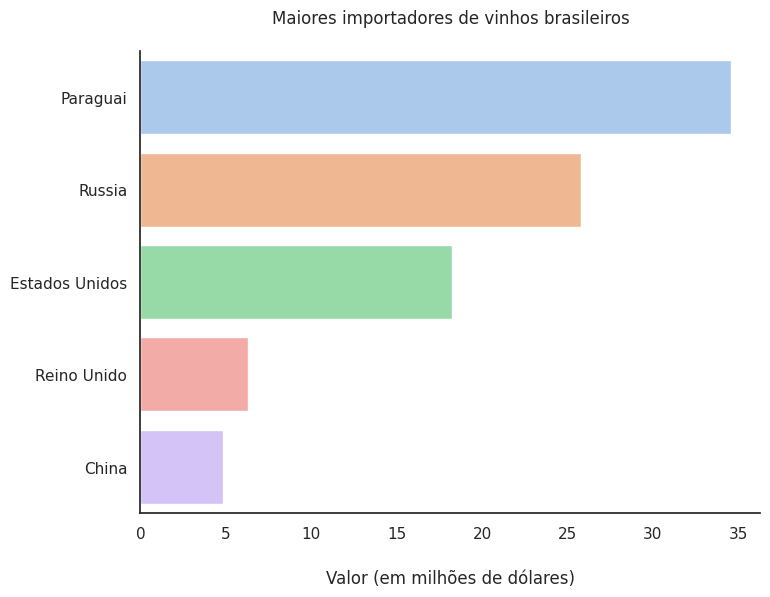

In [9]:
#  Plotar grafico: Maiores importadores de vinhos brasileiros (em milhões de dólares)
df_plot = df_vinhos_paises.sort_values(
    by='valor', ascending=False).head(5).reset_index()
df_plot['valor'] = df_plot['valor'] / 1_000_000
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df_plot, y="pais_destino", x="valor",
            orient='h', ax=ax, palette=df_vinhos_paises_pallete)
ax.set_ylabel(None)
ax.set_xlabel("Valor (em milhões de dólares)", labelpad=20)
ax.set_title("Maiores importadores de vinhos brasileiros", pad=20)


Text(0.5, 1.0, 'Maiores importadores de vinhos brasileiros')

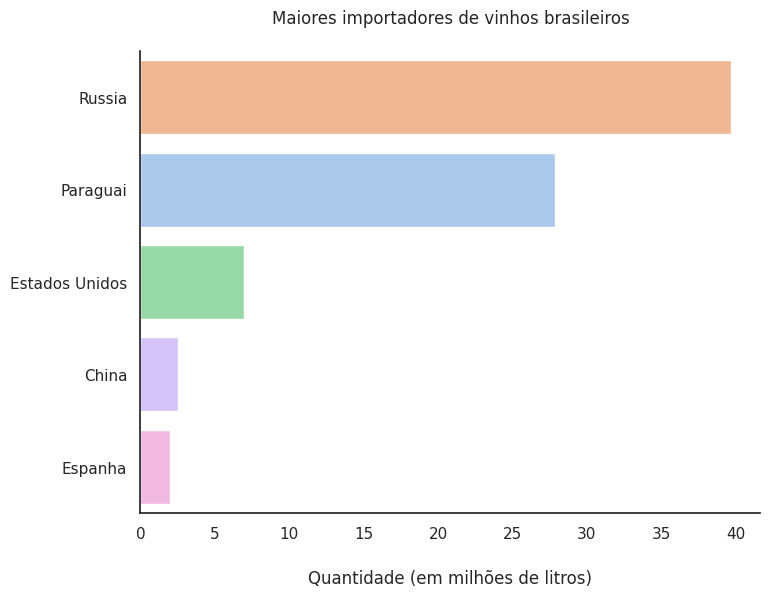

In [10]:
#  Plotar grafico: Maiores importadores de vinhos brasileiros (em quantidade)
df_plot = df_vinhos_paises.sort_values(
    by='quantidade', ascending=False).head(5).reset_index()
df_plot['quantidade'] = df_plot['quantidade'] / 1_000_000
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df_plot, y="pais_destino", x="quantidade",
            orient='h', ax=ax, palette=df_vinhos_paises_pallete)
ax.set_ylabel(None)
ax.set_xlabel("Quantidade (em milhões de litros)", labelpad=20)
ax.set_title("Maiores importadores de vinhos brasileiros", pad=20)


Text(0.5, 1.0, '')

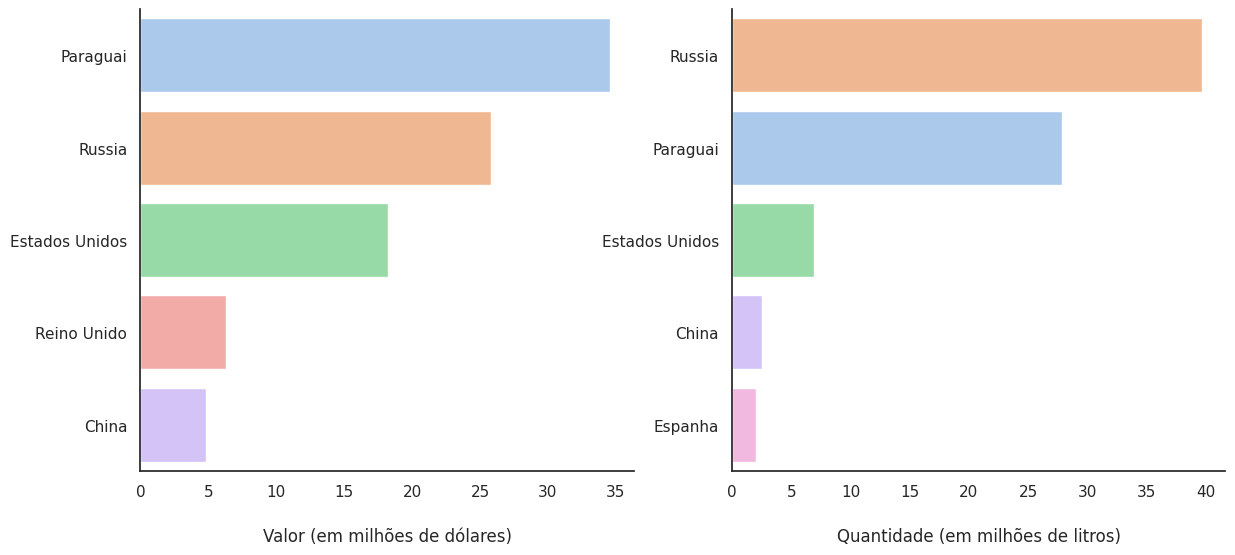

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

#  Plotar grafico: Maiores importadores de vinhos brasileiros (em milhões de dólares)
df_plot_valor = df_vinhos_paises.sort_values(
    by='valor', ascending=False).head(5).reset_index()
df_plot_valor['valor'] = df_plot_valor['valor'] / 1_000_000

sns.barplot(data=df_plot_valor, y="pais_destino", x="valor", orient='h', ax=ax1, palette=df_vinhos_paises_pallete)
ax1.set_ylabel(None)
ax1.set_xlabel("Valor (em milhões de dólares)", labelpad=20)
ax1.set_title(None, pad=20)

#  Plotar grafico: Maiores importadores de vinhos brasileiros (em quantidade)
df_plot_quantidade = df_vinhos_paises.sort_values(by='quantidade', ascending=False).head(5).reset_index()
df_plot_quantidade['quantidade'] = df_plot_quantidade['quantidade'] / 1_000_000

sns.barplot(data=df_plot_quantidade, y="pais_destino", x="quantidade",
            orient='h', ax=ax2, palette=df_vinhos_paises_pallete)
ax2.set_ylabel(None)
ax2.set_xlabel("Quantidade (em milhões de litros)", labelpad=20)
ax2.set_title(None)


In [12]:
espumantes_eua = df_vinhos.query("pais_destino == 'Estados Unidos' and tipo == 'Espumante'").copy()
espumantes_eua['quantidade'] = espumantes_eua['quantidade'] / 1_000_000
x = espumantes_eua['taxa_cambio']
y = espumantes_eua['quantidade']
y.corr(x)


0.7315088723208062

Text(0.5, 1.0, 'Correlação entre a taxa de câmbio e a exportação de espumantes para os EUA')

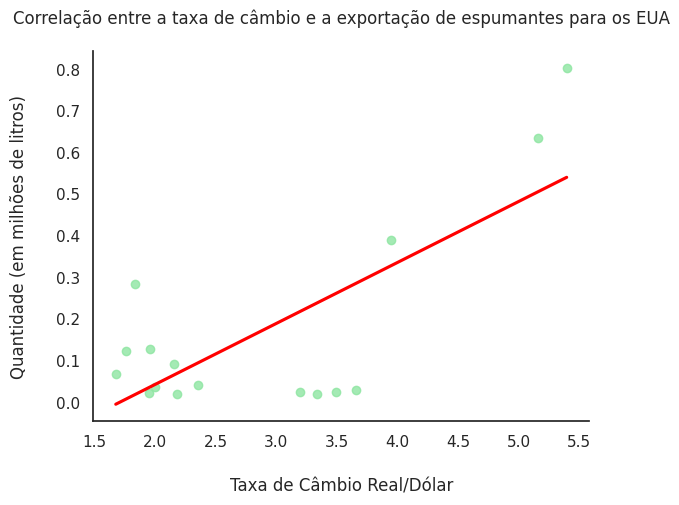

In [13]:
ax = sns.regplot(data=espumantes_eua, x="taxa_cambio", y="quantidade", scatter=True, ci=None, line_kws={
                 'color': 'red'}, scatter_kws={'color': df_vinhos_paises_pallete['Estados Unidos']})
ax.set_ylabel("Quantidade (em milhões de litros)")
ax.set_xlabel("Taxa de Câmbio Real/Dólar")
ax.set_title(
    'Correlação entre a taxa de câmbio e a exportação de espumantes para os EUA')


A Russia tem números absurdos no acumulado porém somente porque teve uns picos em 2008/2009 e 2012/2013. Em termos de % de participação nos últimos anos já é bem abaixo dos EUA

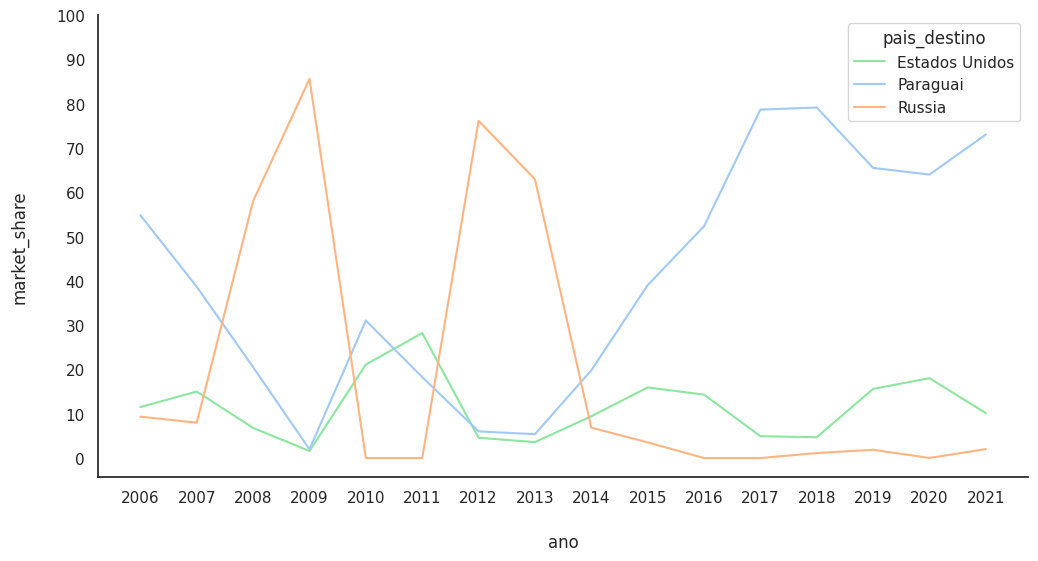

In [14]:
# Market share da Russia e do Paraguai
df_plot = df_vinhos.query("pais_destino in ['Russia', 'Paraguai', 'Estados Unidos']").groupby(
    ['ano', 'pais_destino']).sum(numeric_only=True).reset_index()
df_plot['market_share'] = df_plot['market_share'] * 100

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_plot, x="ano", y="market_share", hue="pais_destino", ax=ax, palette=df_vinhos_paises_pallete)
yticks = ax.set_yticks(range(0, 101, 10))
xticks = ax.set_xticks(df_plot['ano'].unique())


## Aleatório

In [15]:
# Somar a quantidade de vinhos vendidos para cada país nos últimos 15 anos
df_exportacao_pais = df_vinhos.groupby('pais_destino').sum(numeric_only=True).sort_values(by='quantidade', ascending=False,).reset_index()[
    ['pais_destino', 'quantidade', 'proporcao_quantidade', 'valor', 'proporcao_valor']]
df_exportacao_pais['proporcao_cumulativa_quantidade'] = (
    df_exportacao_pais['quantidade'].cumsum() / df_exportacao_pais['quantidade'].sum())
df_exportacao_pais['proporcao_cumulativa_valor'] = (
    df_exportacao_pais['valor'].cumsum() / df_exportacao_pais['valor'].sum())

df_exportacao_pais.head()


,pais_destino,quantidade,proporcao_quantidade,valor,proporcao_valor,proporcao_cumulativa_quantidade,proporcao_cumulativa_valor
0,Russia,39683772,0.426864,25769370,0.205733,0.426864,0.205733
1,Paraguai,27874217,0.299833,34574960,0.276033,0.726696,0.481765
2,Estados Unidos,6940287,0.074654,18230387,0.145544,0.801351,0.627310
3,China,2552973,0.027461,4859698,0.038798,0.828812,0.666108
4,Espanha,2005405,0.021571,3913592,0.031245,0.850383,0.697352


In [16]:
df_exportacao_pais_pareto = df_exportacao_pais.query(
    "proporcao_cumulativa_quantidade <= 0.80 or proporcao_cumulativa_valor <= 0.80")
display(df_exportacao_pais_pareto)


,pais_destino,quantidade,proporcao_quantidade,valor,proporcao_valor,proporcao_cumulativa_quantidade,proporcao_cumulativa_valor
0,Russia,39683772,0.426864,25769370,0.205733,0.426864,0.205733
1,Paraguai,27874217,0.299833,34574960,0.276033,0.726696,0.481765
2,Estados Unidos,6940287,0.074654,18230387,0.145544,0.801351,0.627310
3,China,2552973,0.027461,4859698,0.038798,0.828812,0.666108
4,Espanha,2005405,0.021571,3913592,0.031245,0.850383,0.697352
5,Japao,1965132,0.021138,3384460,0.027020,0.871522,0.724372
6,Reino Unido,1683211,0.018106,6299392,0.050292,0.889627,0.774664


In [17]:
df_exportacao_pais_outros = pd.DataFrame({
    'pais_destino': ['Outros'],
    'quantidade': [df_exportacao_pais['quantidade'].sum() - df_exportacao_pais_pareto['quantidade'].sum()],
    'proporcao_quantidade': [df_exportacao_pais['proporcao_quantidade'].sum() - df_exportacao_pais_pareto['proporcao_quantidade'].sum()],
    'valor': [df_exportacao_pais['valor'].sum() - df_exportacao_pais_pareto['valor'].sum()],
    'proporcao_valor': [df_exportacao_pais['proporcao_valor'].sum() - df_exportacao_pais_pareto['proporcao_valor'].sum()]
})
display(df_exportacao_pais_outros)


,pais_destino,quantidade,proporcao_quantidade,valor,proporcao_valor
0,Outros,10260897,0.110373,28224813,0.225336


Text(0.5, 1.0, 'Gráfico: Maiores importadores de vinho de mesa brasileiro')

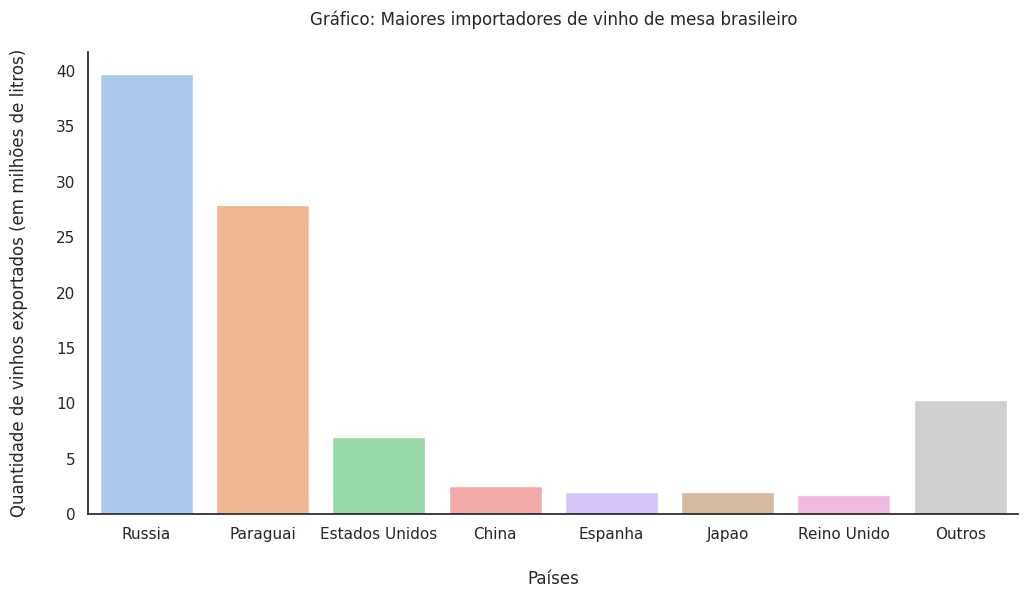

In [18]:
#  Plotar grafico: Maiores importadores de vinhos brasileiros
df_plot = pd.concat([df_exportacao_pais_pareto, df_exportacao_pais_outros])
df_plot["quantidade"] = df_plot["quantidade"] / 1_000_000

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_plot, x="pais_destino", y="quantidade")
ax.set_xlabel("Países")
ax.set_ylabel("Quantidade de vinhos exportados (em milhões de litros)")
ax.set_title("Gráfico: Maiores importadores de vinho de mesa brasileiro")


Text(0.5, 1.0, 'Maiores importadores de vinho de mesa brasileiro')

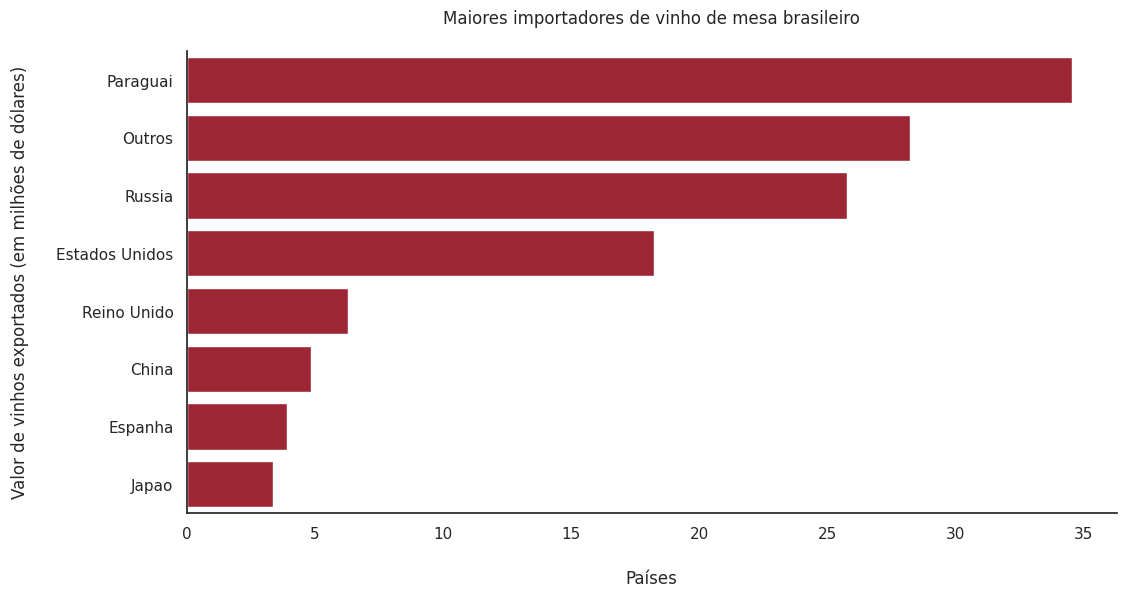

In [19]:
#  Plotar grafico: Maiores importadores de vinhos brasileiros
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = pd.concat([df_exportacao_pais_pareto, df_exportacao_pais_outros])
df_plot["valor"] = df_plot["valor"] / 1_000_000
df_plot.sort_values(by='valor', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_plot, y="pais_destino",
            x="valor", color="#b11226", orient='h')
ax.set_xlabel("Países")
ax.set_ylabel("Valor de vinhos exportados (em milhões de dólares)")
ax.set_title("Maiores importadores de vinho de mesa brasileiro")
